In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Ecommerce SA

In [2]:
#first csv file scraped
df = pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce.csv', sep='\t')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(65996, 36)

In [4]:
df3=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce3.csv', sep='\t')

In [5]:
df4=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2020.csv', sep='\t')

In [6]:
df5=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2019.csv', sep='\t')

In [7]:
df6=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2018.csv', sep='\t')

In [8]:
df7=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2017.csv', sep='\t')

In [9]:
df8=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2016.csv', sep='\t')

In [10]:
df9=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/ecommerce2015.csv', sep='\t')

In [11]:
ec=pd.concat([df,df3,df4,df5,df6,df7,df8,df9], axis=0)

In [12]:
ec = ec[ec.language=='en']

In [16]:
ec.tweet

0         5 Biggest eCommerce Challenges and How to Over...
1         Are your new financial year and strategic proj...
3         Top Reasons to Choose WooCommerce for Your eCo...
7         How Niche Communities Are Changing Online Conv...
8         #Magento #JavaScript #skimmer steals payment d...
                                ...                        
455609    Start shopping on #Facebook  http://t.co/4riRa...
455611    Always worth reading: Ecommerce Digest: August...
455612    3 Ways to Unite Your In-Store &amp; #Ecommerce...
455613    The merger of QVC and zulily will create a $5 ...
455614    The holidays are coming &amp; now's the time t...
Name: tweet, Length: 2136812, dtype: object

In [13]:
#tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= [tokenizer.tokenize(x) for x in ec.tweet]

In [14]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', 'e', 'o', 'u']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'brickandmortar', 'ecommerce',
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', '@brickandmortar', '#brickandmortar']
sw_set = set(sw_list)

In [15]:
#filtering for stop words
filtered_tweets=[]
for i in range(len(tokenized_tweets)):
    for word in tokenized_tweets[i]:
        if word not in sw_set:
            filtered_tweets.append(word)

In [16]:
#lower casing all the tokens
filtered_tweets=[x.lower() for x in filtered_tweets]

In [17]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))

In [18]:
#word frequency table with graph to follow
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

co                  4137369
ecommerce           1243628
de                   513708
marketing            384935
business             312454
en                   304498
online               297247
via                  268102
la                   253898
b                    253048
seo                  230171
retail               225317
commerce             204813
website              204069
store                196971
how                  196111
http                 195385
amazon               193686
the                  193347
sale                 193132
e                    185583
n                    185272
le                   169656
amp                  168164
l                    164142
el                   153823
startup              152858
c                    148421
v                    147864
digitalmarketing     145493
socialmedia          145268
digital              136921
r                    136110
your                 135771
gt                   132290
a                   

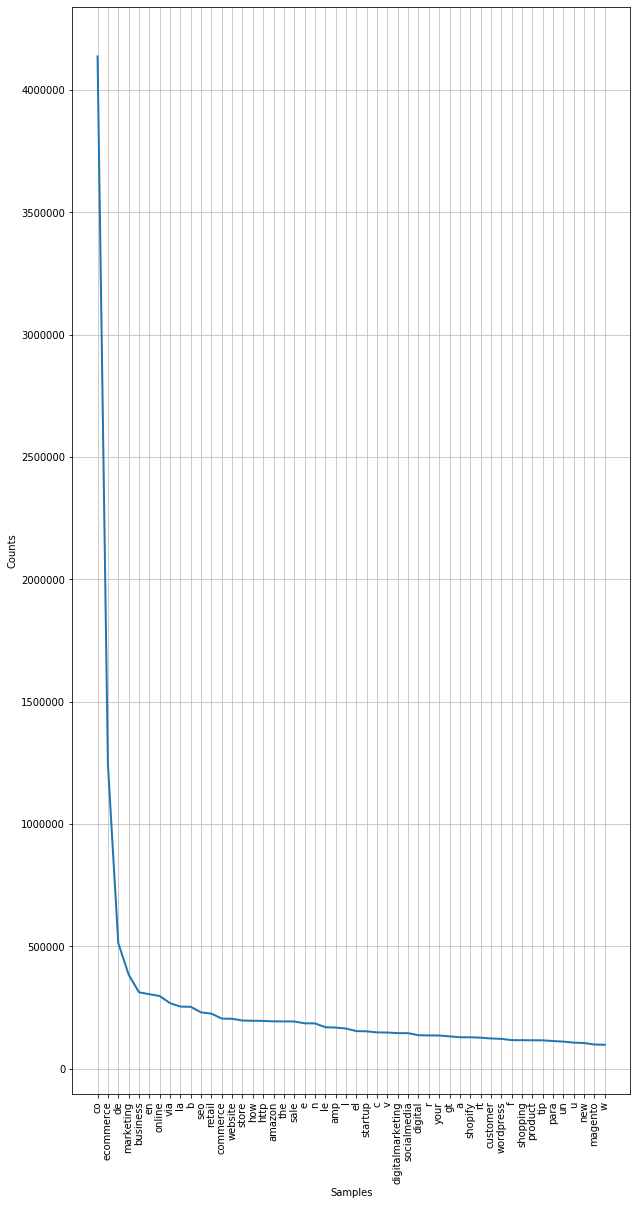

In [19]:
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,20))
fdist.plot(50)

### Vader SA

In [17]:
#importing the vader sentiment analysis package and instantiating it
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [18]:
#list comprehension to get scores from tweets 
a= [analyser.polarity_scores(x) for x in ec['tweet']]

In [19]:
#pulling the relevant score into a list 
b= [x.items() for x in a]

In [20]:
#creating a dataframe of my vader scores of the tweets
data1=pd.DataFrame(b, columns= ['neg', 'neu', 'pos', 'comp'])

In [21]:
#putting my scores into a column in the dataframe
b = data1['comp']

In [22]:
#making a column that grabs the right compound score to gauge sentiment
data1['comp2']= [score[1] for score in b]

In [23]:
#rounding out my vader score
data1['comp2']= data1['comp2'].round(3)

In [24]:
#converting the vader scores into something easier to manipulate so that I can generate three distinct classes
col         = 'comp2'
conditions  = [ data1[col] >= .150, (data1[col] < .150) & (data1[col]> -.150), data1[col] <= -.150 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)

In [25]:
#giving the mapped numbers categories
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [26]:
data1
import pickle 
with open ('vader_on_text', 'wb') as f:
    pickle.dump(data1,f, pickle.HIGHEST_PROTOCOL)

In [27]:
dfec=pd.DataFrame(ec[['date','tweet']])

In [28]:
import pickle
with open ('dfec', 'wb') as f:
    pickle.dump(dfec,f, pickle.HIGHEST_PROTOCOL)

In [29]:
with open ('dfec', 'rb') as f:
    dfec=pickle.load(f)

In [32]:
dfec.reset_index()

,index,date,tweet
0,0,2021-02-23,5 Biggest eCommerce Challenges and How to Over...
1,1,2021-02-23,Are your new financial year and strategic proj...
2,3,2021-02-23,Top Reasons to Choose WooCommerce for Your eCo...
3,7,2021-02-23,How Niche Communities Are Changing Online Conv...
4,8,2021-02-23,#Magento #JavaScript #skimmer steals payment d...
...,...,...,...
2136807,455609,2015-08-31,Start shopping on #Facebook http://t.co/4riRa...
2136808,455611,2015-08-31,Always worth reading: Ecommerce Digest: August...
2136809,455612,2015-08-31,3 Ways to Unite Your In-Store &amp; #Ecommerce...
2136810,455613,2015-08-31,The merger of QVC and zulily will create a $5 ...


In [33]:
ec1=dfec.join(data1)

In [34]:
ec1.dropna()

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,2021-02-23,5 Biggest eCommerce Challenges and How to Over...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2016-12-31,Buyer #Keywords – The Only Guide You Need for ...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2015-12-31,3 Ways Retailers Will Use #SocialMedia in 2016...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
...,...,...,...,...,...,...,...,...,...
692689,2018-05-09,YITH Product Slider Carousel Premium For WooCo...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive
692691,2018-05-09,As changes within the complex voice ecosystem ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
692692,2018-05-09,Will ASOS' visual search tool revolutionize th...,"(neg, 0.085)","(neu, 0.915)","(pos, 0.0)","(compound, -0.3612)",-0.361,-1.0,negative
692693,2018-05-09,This will hurt us all online sellers. #makeyou...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive


In [35]:
#finding all the positive tweets for bricknmortar
ec1[ec1.comp4=='positive']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
2,2020-12-31,The best marketing campaigns consider these fi...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
2,2020-12-31,The best marketing campaigns consider these fi...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
2,2018-12-31,Out with the old and in with the new!✨ May yo...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
2,2017-12-31,Already testing your #ecommerce site? Here's 9...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
2,2016-12-31,How to build an #Online #Store being a #dummy ...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
...,...,...,...,...,...,...,...,...,...
692686,2018-05-09,Inquiring Minds want to know? #Businesses #Aff...,"(neg, 0.0)","(neu, 0.847)","(pos, 0.153)","(compound, 0.6996)",0.700,1.0,positive
692687,2018-05-09,‘The Automated Local #Fulfillment Imperative’ ...,"(neg, 0.0)","(neu, 0.807)","(pos, 0.193)","(compound, 0.2732)",0.273,1.0,positive
692688,2018-05-09,‘The Automated Local #Fulfillment Imperative’ ...,"(neg, 0.0)","(neu, 0.909)","(pos, 0.091)","(compound, 0.5719)",0.572,1.0,positive
692689,2018-05-09,YITH Product Slider Carousel Premium For WooCo...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive


In [36]:
#finding all the negative tweets for bricknmortar
ec1[ec1.comp4=='negative']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
4,2019-12-31,5 Important #Design Features Your E-Commerce S...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
4,2018-12-31,20 Ways To Make Ideal Mobile E-Commerce Checko...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
4,2017-12-31,#DELORTAEAGENCY &amp; #LIC from our family to ...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
4,2016-12-31,How to determine which eCommerce platforms are...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
4,2015-12-31,Celeritas Zooplus y Kiabi: The post Celeritas ...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
...,...,...,...,...,...,...,...,...,...
692612,2018-05-09,From Digital to Physical Commerce: Le https:/...,"(neg, 0.123)","(neu, 0.877)","(pos, 0.0)","(compound, -0.5423)",-0.542,-1.0,negative
692613,2018-05-09,Businesses on Instagram Are Getting Calls to A...,"(neg, 0.141)","(neu, 0.781)","(pos, 0.078)","(compound, -0.25)",-0.250,-1.0,negative
692639,2018-05-09,"Walked away very inspired listening to @tobi ,...","(neg, 0.091)","(neu, 0.909)","(pos, 0.0)","(compound, -0.2263)",-0.226,-1.0,negative
692653,2018-05-09,#IceCreamLabs Uses #MachineLearning and #Visua...,"(neg, 0.091)","(neu, 0.909)","(pos, 0.0)","(compound, -0.3804)",-0.380,-1.0,negative


In [37]:
#finding the neutral tweets with bricknmortar
ec1[ec1.comp4=='neutral']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,2021-02-23,5 Biggest eCommerce Challenges and How to Over...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2016-12-31,Buyer #Keywords – The Only Guide You Need for ...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2015-12-31,3 Ways Retailers Will Use #SocialMedia in 2016...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
...,...,...,...,...,...,...,...,...,...
692677,2018-05-09,What do #unicorns do? Top 5 industries breedin...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
692681,2018-05-09,Report: Instagram is Testing a New In-App Paym...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
692682,2018-05-09,"Google, Amazon and the relationship b https:/...","(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
692691,2018-05-09,As changes within the complex voice ecosystem ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral


Text(0.5, 1.0, 'Opinion Mining - Sentiment of E-Commerce Stores 2015-2021')

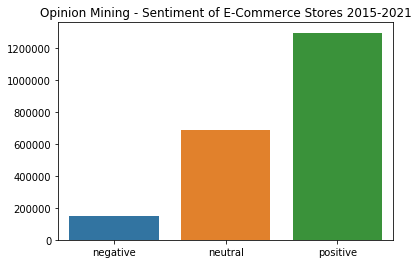

In [38]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[ ec1[ec1.comp4=='negative'].shape[0], 
                ec1[ec1.comp4=='neutral'].shape[0], ec1[ec1.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of E-Commerce Stores 2015-2021')

In [42]:
ec1.reset_index()

,index,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,0,2021-02-23,5 Biggest eCommerce Challenges and How to Over...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
1,0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
2,0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
3,0,2016-12-31,Buyer #Keywords – The Only Guide You Need for ...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
4,0,2015-12-31,3 Ways Retailers Will Use #SocialMedia in 2016...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...
2136807,692689,2018-05-09,YITH Product Slider Carousel Premium For WooCo...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive
2136808,692691,2018-05-09,As changes within the complex voice ecosystem ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2136809,692692,2018-05-09,Will ASOS' visual search tool revolutionize th...,"(neg, 0.085)","(neu, 0.915)","(pos, 0.0)","(compound, -0.3612)",-0.361,-1.0,negative
2136810,692693,2018-05-09,This will hurt us all online sellers. #makeyou...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive


In [68]:
dataset=ec1[ec1.date>='2015-01-01']

In [44]:
datasetone=dataset[dataset.date<='2015-12-31']

In [48]:
datasetone
import pickle
with open('2015ec1', 'wb') as f:
    pickle.dump(datasetone, f, pickle.HIGHEST_PROTOCOL)

In [50]:
dataset=ec1[ec1.date>='2016-01-01']

In [51]:
datasettwo=dataset[dataset.date<='2016-12-31']

In [53]:
datasettwo
import pickle
with open('2016ec1', 'wb') as f:
    pickle.dump(datasettwo, f, pickle.HIGHEST_PROTOCOL)

In [52]:
datasettwo

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,2016-12-31,Buyer #Keywords – The Only Guide You Need for ...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
1,2016-12-31,Sale your products today #ecommerce #storeowne...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,2016-12-31,How to build an #Online #Store being a #dummy ...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
3,2016-12-31,#Ecommerce and Chargebacks: How to #Manage and...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
4,2016-12-31,How to determine which eCommerce platforms are...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
...,...,...,...,...,...,...,...,...,...
551686,2016-08-11,#Ecommerce #Startups After petitioning by hors...,"(neg, 0.0)","(neu, 0.734)","(pos, 0.266)","(compound, 0.8564)",0.856,1.0,positive
551687,2016-08-11,How https://t.co/EMmwwsswhC will help Walmart...,"(neg, 0.0)","(neu, 0.914)","(pos, 0.086)","(compound, 0.1779)",0.178,1.0,positive
551689,2016-08-11,Is Indian #ecommerce capable of overtaking Chi...,"(neg, 0.0)","(neu, 0.792)","(pos, 0.208)","(compound, 0.8957)",0.896,1.0,positive
551691,2016-08-11,73 Time Saving &amp; Money Making Tools for En...,"(neg, 0.0)","(neu, 0.734)","(pos, 0.266)","(compound, 0.8564)",0.856,1.0,positive


In [54]:
dataset=ec1[ec1.date>='2017-01-01']

In [55]:
datasetthree=dataset[dataset.date<='2017-12-31']

In [57]:
datasetthree
import pickle
with open('2017ec1', 'wb') as f:
    pickle.dump(datasetthree, f, pickle.HIGHEST_PROTOCOL)

In [79]:
dataset=ec1[ec1.date>='2018-01-01']

In [80]:
datasetfour=dataset[dataset.date<='2018-12-31']

In [84]:
datasetfour
import pickle
with open('2018ec1', 'wb') as f:
    pickle.dump(datasetfive, f, pickle.HIGHEST_PROTOCOL)

In [85]:
datasetfour

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
1,2018-12-31,I appreciate all the love over the few months ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,2018-12-31,Out with the old and in with the new!✨ May yo...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
4,2018-12-31,20 Ways To Make Ideal Mobile E-Commerce Checko...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
5,2018-12-31,"Happy New Year 2019 , we hope that 2019 makes ...","(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
6,2018-12-31,Fun Facts #Pinterest #Marketing #Advertising #...,"(neg, 0.0)","(neu, 0.823)","(pos, 0.177)","(compound, 0.6566)",0.657,1.0,positive
...,...,...,...,...,...,...,...,...,...
692689,2018-05-09,YITH Product Slider Carousel Premium For WooCo...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive
692691,2018-05-09,As changes within the complex voice ecosystem ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
692692,2018-05-09,Will ASOS' visual search tool revolutionize th...,"(neg, 0.085)","(neu, 0.915)","(pos, 0.0)","(compound, -0.3612)",-0.361,-1.0,negative
692693,2018-05-09,This will hurt us all online sellers. #makeyou...,"(neg, 0.0)","(neu, 0.776)","(pos, 0.224)","(compound, 0.4389)",0.439,1.0,positive


In [86]:
dataset=ec1[ec1.date>='2019-01-01']

In [87]:
datasetfive=dataset[dataset.date<='2019-12-31']

In [88]:
datasetfive
import pickle
with open('2019ec1', 'wb') as f:
    pickle.dump(datasetfive, f, pickle.HIGHEST_PROTOCOL)

In [65]:
datasetsix=ec1[ec1.date>='2020-01-01']

In [66]:
datasetsix
import pickle
with open('2020-21ec1', 'wb') as f:
    pickle.dump(datasetsix, f, pickle.HIGHEST_PROTOCOL)

In [67]:
datasetsix

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,2021-02-23,5 Biggest eCommerce Challenges and How to Over...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
0,2020-12-31,Do you want to #eCommerce For Your #Business #...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
1,2021-02-23,Are your new financial year and strategic proj...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,2020-12-31,The best marketing campaigns consider these fi...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
...,...,...,...,...,...,...,...,...,...
111554,2020-11-17,Cheap #promote any #marketplace integrated #ec...,"(neg, 0.0)","(neu, 0.922)","(pos, 0.078)","(compound, 0.4019)",0.402,1.0,positive
111558,2020-11-17,Growing a Niche Product into an 8 Figure Busin...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.4389)",0.439,1.0,positive
111559,2020-11-17,Growing a Niche Product into an 8 Figure Busin...,"(neg, 0.052)","(neu, 0.67)","(pos, 0.278)","(compound, 0.8882)",0.888,1.0,positive
111561,2020-11-17,#makeinindia #statupindia #ecommerce https://...,"(neg, 0.046)","(neu, 0.823)","(pos, 0.131)","(compound, 0.6124)",0.612,1.0,positive


In [69]:
datasetone[datasetone.comp4=='positive']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
2,2015-12-31,Mobile devices are the future of #ecommerce. W...,"(neg, 0.0)","(neu, 0.927)","(pos, 0.073)","(compound, 0.2023)",0.202,1.0,positive
11,2015-12-31,https://t.co/6zRdkhoxI5: Ecommerce SEO: The C...,"(neg, 0.0)","(neu, 0.907)","(pos, 0.093)","(compound, 0.5423)",0.542,1.0,positive
12,2015-12-31,Why podcasting is not just another shiny new #...,"(neg, 0.0)","(neu, 0.746)","(pos, 0.254)","(compound, 0.802)",0.802,1.0,positive
16,2015-12-31,"""Do you embody the personality and mind-set of...","(neg, 0.05)","(neu, 0.796)","(pos, 0.154)","(compound, 0.5994)",0.599,1.0,positive
18,2015-12-31,FedEx Corporation's Worst Moves in 2015 https...,"(neg, 0.0)","(neu, 0.868)","(pos, 0.132)","(compound, 0.5719)",0.572,1.0,positive
...,...,...,...,...,...,...,...,...,...
455608,2015-08-31,A Top Amazon Executive Just Departed for the S...,"(neg, 0.0)","(neu, 0.709)","(pos, 0.291)","(compound, 0.9265)",0.926,1.0,positive
455609,2015-08-31,Start shopping on #Facebook http://t.co/4riRa...,"(neg, 0.0)","(neu, 0.895)","(pos, 0.105)","(compound, 0.5106)",0.511,1.0,positive
455611,2015-08-31,Always worth reading: Ecommerce Digest: August...,"(neg, 0.0)","(neu, 0.791)","(pos, 0.209)","(compound, 0.5719)",0.572,1.0,positive
455612,2015-08-31,3 Ways to Unite Your In-Store &amp; #Ecommerce...,"(neg, 0.035)","(neu, 0.842)","(pos, 0.124)","(compound, 0.5563)",0.556,1.0,positive


In [70]:
datasetone[datasetone.comp4=='neutral']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,2015-12-31,3 Ways Retailers Will Use #SocialMedia in 2016...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
1,2015-12-31,"The holidays are over, but what does that mean...","(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
13,2015-12-31,Why podcasting is not just another shiny new #...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
20,2015-12-31,Do you embody the personality and mind-set of ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
21,2015-12-31,"""What qualities to look for in merchants: On-t...","(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
...,...,...,...,...,...,...,...,...,...
455592,2015-08-31,5 Best Practices for B2B #eCommerce Adoption ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
455598,2015-08-31,IR_Magazine: #Mobile accounted for 25% of ULTA...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
455599,2015-08-31,Join us tonight for the Triangle #eCommerce #M...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
455605,2015-08-31,"One unified business management suite, encompa...","(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral


In [71]:
datasetone[datasetone.comp4=='negative']

,date,tweet,neg,neu,pos,comp,comp2,comp3,comp4
4,2015-12-31,Celeritas Zooplus y Kiabi: The post Celeritas ...,"(neg, 0.155)","(neu, 0.845)","(pos, 0.0)","(compound, -0.5106)",-0.511,-1.0,negative
14,2015-12-31,Ecommerce SEO: The Complete How-To #ecommerce ...,"(neg, 0.112)","(neu, 0.888)","(pos, 0.0)","(compound, -0.4215)",-0.422,-1.0,negative
23,2015-12-31,"""Online Business Myth-Its too late to start an...","(neg, 0.152)","(neu, 0.848)","(pos, 0.0)","(compound, -0.7269)",-0.727,-1.0,negative
39,2015-12-31,rida_shah: coloringpageart: Complete #Ecommerc...,"(neg, 0.223)","(neu, 0.777)","(pos, 0.0)","(compound, -0.5129)",-0.513,-1.0,negative
54,2015-12-31,superstarseo4: https://t.co/O8nuHfeK2y Follow...,"(neg, 0.041)","(neu, 0.939)","(pos, 0.02)","(compound, -0.2732)",-0.273,-1.0,negative
...,...,...,...,...,...,...,...,...,...
455417,2015-08-31,The average #ecommerce cart abandonment rate i...,"(neg, 0.184)","(neu, 0.816)","(pos, 0.0)","(compound, -0.6597)",-0.660,-1.0,negative
455452,2015-08-31,Shippo is 3 months free plus get discounted US...,"(neg, 0.123)","(neu, 0.821)","(pos, 0.056)","(compound, -0.3802)",-0.380,-1.0,negative
455497,2015-08-31,WordPress – Sell 3DSMax Stock Graphics With...,"(neg, 0.186)","(neu, 0.715)","(pos, 0.099)","(compound, -0.4226)",-0.423,-1.0,negative
455512,2015-08-31,#Ecommerce Email #Marketing: 10 Tips to Boost ...,"(neg, 0.065)","(neu, 0.935)","(pos, 0.0)","(compound, -0.2732)",-0.273,-1.0,negative


Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2015')

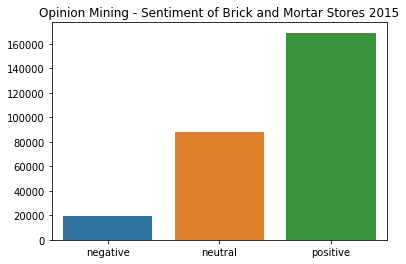

In [72]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetone[datasetone.comp4=='negative'].shape[0], 
            datasetone[datasetone.comp4=='neutral'].shape[0], datasetone[datasetone.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2015')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2016')

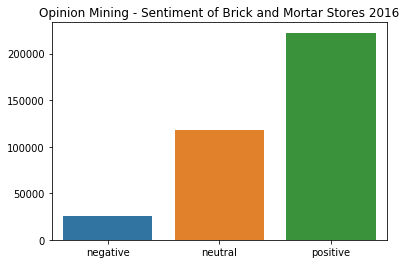

In [74]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasettwo[datasettwo.comp4=='negative'].shape[0], 
            datasettwo[datasettwo.comp4=='neutral'].shape[0], datasettwo[datasettwo.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2016')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2017')

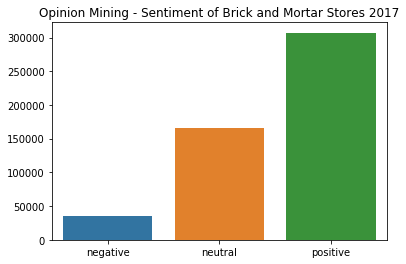

In [75]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetthree[datasetthree.comp4=='negative'].shape[0], 
            datasetthree[datasetthree.comp4=='neutral'].shape[0], datasetthree[datasetthree.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2017')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2018')

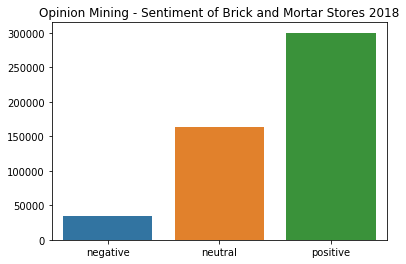

In [89]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetfour[datasetfour.comp4=='negative'].shape[0], 
            datasetfour[datasetfour.comp4=='neutral'].shape[0], datasetfour[datasetfour.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2018')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2019')

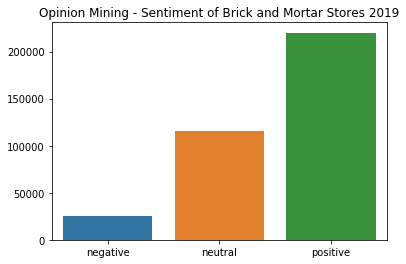

In [91]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetfive[datasetfive.comp4=='negative'].shape[0], 
            datasetfive[datasetfive.comp4=='neutral'].shape[0], datasetfive[datasetfive.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2019')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2020-21')

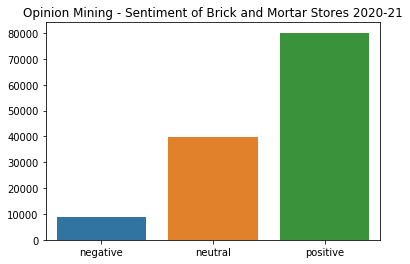

In [93]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetsix[datasetsix.comp4=='negative'].shape[0], 
            datasetsix[datasetsix.comp4=='neutral'].shape[0], datasetsix[datasetsix.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2020-21')